In [ ]:
import numpy as np

# Input dan target (x1, x2) dan output
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([0, 0, 0, 1])  # Target

w = np.array([0, 0])  # bobot awal
b = 0                 # bias awal
learning_rate = 1
max_epoch = 10

def step_function(x):
    return 1 if x >= 0 else 0  # Ini mengikuti 'sign(0) = 1' dari modul

for epoch in range(max_epoch):
    print(f"\nEpoch ke-{epoch+1}")
    error_found = False

    for i in range(len(X)):
        x_i = X[i]
        target = y[i]

        y_in = np.dot(x_i, w) + b
        y_pred = step_function(y_in)

        error = target - y_pred

        if error != 0:
            w = w + learning_rate * error * x_i
            b = b + learning_rate * error
            error_found = True

        print(f"Data {x_i}, Target: {target}, Pred: {y_pred}, Error: {error}, w: {w}, b: {b}")

    if not error_found:
        print("Tidak ada error, training selesai.")
        break

print("\n=== Uji Model ===")
for i in range(len(X)):
    y_in = np.dot(X[i], w) + b
    y_pred = step_function(y_in)
    print(f"Input: {X[i]}, Prediksi: {y_pred}, Target: {y[i]}")



Epoch ke-1
Data [0 0], Target: 0, Pred: 1, Error: -1, w: [0 0], b: -1
Data [0 1], Target: 0, Pred: 0, Error: 0, w: [0 0], b: -1
Data [1 0], Target: 0, Pred: 0, Error: 0, w: [0 0], b: -1
Data [1 1], Target: 1, Pred: 0, Error: 1, w: [1 1], b: 0

Epoch ke-2
Data [0 0], Target: 0, Pred: 1, Error: -1, w: [1 1], b: -1
Data [0 1], Target: 0, Pred: 1, Error: -1, w: [1 0], b: -2
Data [1 0], Target: 0, Pred: 0, Error: 0, w: [1 0], b: -2
Data [1 1], Target: 1, Pred: 0, Error: 1, w: [2 1], b: -1

Epoch ke-3
Data [0 0], Target: 0, Pred: 0, Error: 0, w: [2 1], b: -1
Data [0 1], Target: 0, Pred: 1, Error: -1, w: [2 0], b: -2
Data [1 0], Target: 0, Pred: 1, Error: -1, w: [1 0], b: -3
Data [1 1], Target: 1, Pred: 0, Error: 1, w: [2 1], b: -2

Epoch ke-4
Data [0 0], Target: 0, Pred: 0, Error: 0, w: [2 1], b: -2
Data [0 1], Target: 0, Pred: 0, Error: 0, w: [2 1], b: -2
Data [1 0], Target: 0, Pred: 1, Error: -1, w: [1 1], b: -3
Data [1 1], Target: 1, Pred: 0, Error: 1, w: [2 2], b: -2

Epoch ke-5
Data [0

In [ ]:
import numpy as np

# Fungsi Aktivasi Sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Fungsi Derivatif Sigmoid
def sigmoid_derivative(x):
    return x * (1 - x)

# Data Input dan Target
x1 = 0.05
x2 = 0.10
t = 0.01  # Target output

# Bobot dan Bias Awal
w1 = 0.15  # x1 → h1
w2 = 0.20  # x2 → h1
w3 = 0.25  # x1 → h2
w4 = 0.30  # x2 → h2
b_h1 = 0.35  # Bias hidden layer → h1
b_h2 = 0.35  # Bias hidden layer → h2

w5 = 0.40  # h1 → y
w6 = 0.45  # h2 → y
b_o = 0.60  # Bias output layer

# Learning rate
lr = 0.5

# Jumlah Epoch
epochs = 100

# Loop untuk Epoch
for epoch in range(epochs):
    # Forward Pass: Hitung Output dari Hidden Layer
    net_h1 = (x1 * w1) + (x2 * w2) + b_h1
    out_h1 = sigmoid(net_h1)

    net_h2 = (x1 * w3) + (x2 * w4) + b_h2
    out_h2 = sigmoid(net_h2)

    # Forward Pass: Hitung Output dari Output Layer
    net_y = (out_h1 * w5) + (out_h2 * w6) + b_o
    out_y = sigmoid(net_y)
# Hitung Error (MSE)
    E = 0.5 * (t - out_y) ** 2

    # Backpropagation: Hitung Delta untuk Output Neuron
    delta_y = (out_y - t) * sigmoid_derivative(out_y)

    # Update Bobot dan Bias Hidden → Output
    w5_new = w5 - (lr * delta_y * out_h1)
    w6_new = w6 - (lr * delta_y * out_h2)
    b_o_new = b_o - (lr * delta_y)

    # Backpropagation: Hitung Delta untuk Hidden Neurons
    delta_h1 = delta_y * w5 * sigmoid_derivative(out_h1)
    delta_h2 = delta_y * w6 * sigmoid_derivative(out_h2)

    # Update Bobot dan Bias Input → Hidden
    w1_new = w1 - (lr * delta_h1 * x1)
    w2_new = w2 - (lr * delta_h1 * x2)
    b_h1_new = b_h1 - (lr * delta_h1)

    w3_new = w3 - (lr * delta_h2 * x1)
    w4_new = w4 - (lr * delta_h2 * x2)
    b_h2_new = b_h2 - (lr * delta_h2)

    # Update bobot dan bias untuk iterasi berikutnya
    w1, w2, w3, w4 = w1_new, w2_new, w3_new, w4_new
    b_h1, b_h2, w5, w6, b_o = b_h1_new, b_h2_new, w5_new, w6_new, b_o_new

    # Output setiap epoch
    print(f"Epoch {epoch+1}/{epochs} - Error (MSE): {E:.6f}")
    print(f"Perubahan Bobot dan Bias:")
    print(f"w1: {w1_new:.4f} (Perubahan: {w1_new - w1:.4f})")
    print(f"w2: {w2_new:.4f} (Perubahan: {w2_new - w2:.4f})")
    print(f"w3: {w3_new:.4f} (Perubahan: {w3_new - w3:.4f})")
    print(f"w4: {w4_new:.4f} (Perubahan: {w4_new - w4:.4f})")
    print(f"b_h1: {b_h1_new:.4f} (Perubahan: {b_h1_new - b_h1:.4f})")
    print(f"b_h2: {b_h2_new:.4f} (Perubahan: {b_h2_new - b_h2:.4f})")
    print(f"w5: {w5_new:.4f} (Perubahan: {w5_new - w5:.4f})")
    print(f"w6: {w6_new:.4f} (Perubahan: {w6_new - w6:.4f})")
    print(f"b_o: {b_o_new:.4f} (Perubahan: {b_o_new - b_o:.4f})")
    print('-' * 50)

Epoch 1/100 - Error (MSE): 0.274811
Perubahan Bobot dan Bias:
w1: 0.1497 (Perubahan: 0.0000)
w2: 0.1993 (Perubahan: 0.0000)
w3: 0.2496 (Perubahan: 0.0000)
w4: 0.2993 (Perubahan: 0.0000)
b_h1: 0.3433 (Perubahan: 0.0000)
b_h2: 0.3425 (Perubahan: 0.0000)
w5: 0.3589 (Perubahan: 0.0000)
w6: 0.4087 (Perubahan: 0.0000)
b_o: 0.5308 (Perubahan: 0.0000)
--------------------------------------------------
Epoch 2/100 - Error (MSE): 0.258015
Perubahan Bobot dan Bias:
w1: 0.1494 (Perubahan: 0.0000)
w2: 0.1987 (Perubahan: 0.0000)
w3: 0.2493 (Perubahan: 0.0000)
w4: 0.2986 (Perubahan: 0.0000)
b_h1: 0.3372 (Perubahan: 0.0000)
b_h2: 0.3355 (Perubahan: 0.0000)
w5: 0.3169 (Perubahan: 0.0000)
w6: 0.3664 (Perubahan: 0.0000)
b_o: 0.4597 (Perubahan: 0.0000)
--------------------------------------------------
Epoch 3/100 - Error (MSE): 0.240478
Perubahan Bobot dan Bias:
w1: 0.1491 (Perubahan: 0.0000)
w2: 0.1982 (Perubahan: 0.0000)
w3: 0.2490 (Perubahan: 0.0000)
w4: 0.2979 (Perubahan: 0.0000)
b_h1: 0.3316 (Peruba

In [ ]:
# 1. Upload file Excel
from google.colab import files
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
uploaded = files.upload()
# 2. Ambil nama file Excel dari hasil upload
filename = list(uploaded.keys())[0]
# 3. Baca Excel jadi DataFrame
df = pd.read_excel(io.BytesIO(uploaded[filename]))
# 4. Lihat isi file
df.head()

Saving harga_minyak_dummy.xlsx to harga_minyak_dummy (7).xlsx


,Harga
0,75.32
1,74.98
2,75.12
3,75.67
4,76.15


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

# Pastikan 'Nilai' adalah kolom yang valid dalam DataFrame
# 1. Normalisasi data dengan MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Harga']])  # Pastikan nama kolom benar (misalnya 'Harga' atau 'Nilai')

# Buat DataFrame untuk hasil normalisasi
normalized_df = pd.DataFrame(scaled_data, columns=['Harga_Ternormalisasi'])  # Gantilah 'Nilai_Ternormalisasi' sesuai dengan kebutuhan
print("\n=== Hasil Normalisasi (10 data pertama) ===")
print(normalized_df.head(10))

# 2. Windowing
def windowed_dataset(series, window_size):
    X, y = [], []
    for i in range(len(series) - window_size):
        X.append(series[i:i + window_size])
        y.append(series[i + window_size])
    return np.array(X), np.array(y)

# Tentukan ukuran window
window_size = 3
X, y = windowed_dataset(scaled_data, window_size)

# 3. Tampilkan Hasil Windowing
# Tampilkan 5 window pertama dalam bentuk tabel
window_df = pd.DataFrame(X[:5].reshape(5, window_size), columns=[f'T-{window_size - i}' for i in range(window_size)])
window_df['Target'] = y[:5]
print("\n=== Contoh Hasil Windowing (5 data pertama) ===")
print(window_df)



=== Hasil Normalisasi (10 data pertama) ===
   Harga_Ternormalisasi
0              0.546763
1              0.511819
2              0.526208
3              0.582734
4              0.632066
5              0.605344
6              0.558068
7              0.508736
8              0.477903
9              0.491264

=== Contoh Hasil Windowing (5 data pertama) ===
        T-3       T-2       T-1    Target
0  0.546763  0.511819  0.526208  0.582734
1  0.511819  0.526208  0.582734  0.632066
2  0.526208  0.582734  0.632066  0.605344
3  0.582734  0.632066  0.605344  0.558068
4  0.632066  0.605344  0.558068  0.508736


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, shuffle=False
)
print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape :", y_test.shape)


X_train shape: (77, 3, 1)
X_test shape : (20, 3, 1)
y_train shape: (77, 1)
y_test shape : (20, 1)


In [ ]:
print("\nContoh X_train[0]:", X_train[0].flatten())
print("Target y_train[0]:", y_train[0][0])
print("\nContoh X_test[0]:", X_test[0].flatten())
print("Target y_test[0]:", y_test[0][0])


Contoh X_train[0]: [0.54676259 0.51181912 0.52620761]
Target y_train[0]: 0.5827338129496402

Contoh X_test[0]: [0.53545735 0.50976362 0.47584789]
Target y_test[0]: 0.45015416238437744


In [ ]:
# Tampilkan 3 data awal dari X_test dan targetnya
test_window_df = pd.DataFrame(X_test[:3].reshape(3, X_test.shape[1]),
columns=[f'T-{X_test.shape[1] - i}' for i
in range(X_test.shape[1])])
test_window_df['Target'] = y_test[:3]
print("\nContoh isi X_test:")
print(test_window_df)



Contoh isi X_test:
        T-3       T-2       T-1    Target
0  0.535457  0.509764  0.475848  0.450154
1  0.509764  0.475848  0.450154  0.430627
2  0.475848  0.450154  0.430627  0.404933


In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(window_size,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=50,
validation_data=(X_test, y_test))

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 393ms/step - loss: 0.2531 - val_loss: 0.0196
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - loss: 0.1591 - val_loss: 0.0092
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 0.1001 - val_loss: 0.0037
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0553 - val_loss: 0.0028
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0244 - val_loss: 0.0056
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0078 - val_loss: 0.0108
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0030 - val_loss: 0.0168
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0045 - val_loss: 0.0219
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0085 - val_loss: 0.0244
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0096 - val_loss: 0.0241
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0094 - val_loss: 0.0217
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0071 - val_loss: 0.0185
Epoch 13/

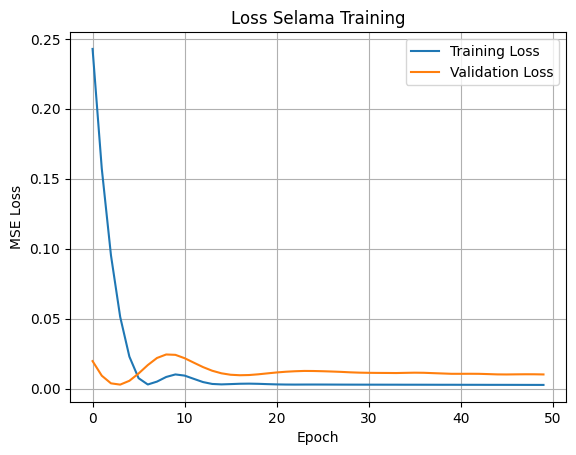

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Selama Training')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


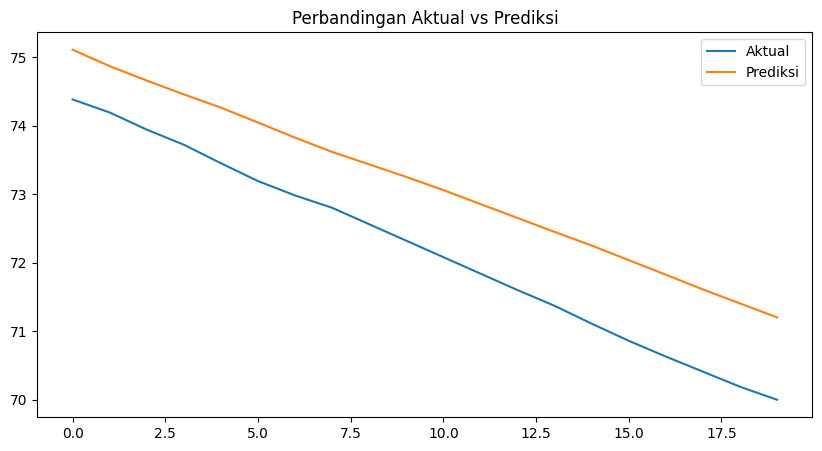

In [ ]:
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
plt.figure(figsize=(10,5))
plt.plot(y_test_inv, label='Aktual')
plt.plot(y_pred_inv, label='Prediksi')
plt.legend()
plt.title('Perbandingan Aktual vs Prediksi')
plt.show()


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print("RMSE:", rmse)

RMSE: 0.977888762422609
